In [64]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [65]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
essay = ctrl.Antecedent(np.arange(0, 11, 1), 'essay')
pilgan = ctrl.Antecedent(np.arange(0, 21,1), 'pilgan')
waktu = ctrl.Consequent(np.arange(0, 121, 1), 'waktu')

# Auto-membership function population is possible with .automf(3, 5, or 7)

essay['sedikit'] = fuzz.trimf(essay.universe, [0, 0, 3])
essay['sedang'] = fuzz.trimf(essay.universe, [0, 4, 10])
essay['banyak'] = fuzz.trimf(essay.universe, [5, 10, 10])

pilgan['sedikit'] = fuzz.trimf(pilgan.universe, [0, 0, 5])
pilgan['sedang'] = fuzz.trimf(pilgan.universe, [5, 13, 20])
pilgan['banyak'] = fuzz.trimf(pilgan.universe, [10, 20, 20])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
waktu['sedikit'] = fuzz.trimf(waktu.universe, [0, 0, 45])
waktu['sedang'] = fuzz.trimf(waktu.universe, [30, 75, 120])
waktu['banyak'] = fuzz.trimf(waktu.universe, [60, 120, 120])

c:\users\gl553vw\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\gl553vw\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\gl553vw\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


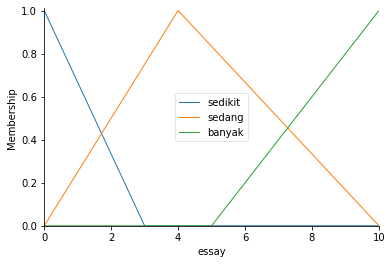

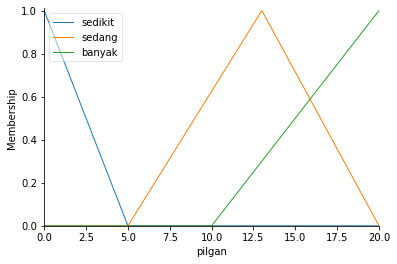

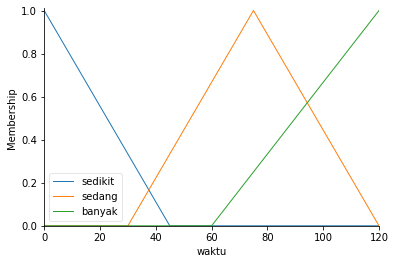

In [66]:
# You can see how these look with .view()
essay.view()
pilgan.view()
waktu.view()

In [67]:
rule1 = ctrl.Rule(essay['sedikit'] & pilgan['sedikit'], waktu['sedikit'])
rule2 = ctrl.Rule(essay['sedang'] & pilgan['sedang'], waktu['sedang'])
rule3 = ctrl.Rule(essay['banyak'] & pilgan['banyak'], waktu['banyak'])
 
print("RULE 1 = IF soal \033[1mEssay\033[0m \033[1m(Sedikit)\033[0m dan soal \033[1mPilihan ganda\033[0m \033[1m(Sedikit)\033[0m THEN \033[1mWaktu\033[0m yang dialokasikan \033[1m(Sedikit)\033[0m")
print("RULE 2 = IF soal \033[1mEssay\033[0m \033[1m(Sedang)\033[0m dan soal \033[1mPilihan ganda\033[0m \033[1m(Sedang)\033[0m THEN \033[1mWaktu\033[0m yang dialokasikan \033[1m(Sedang)\033[0m")
print("RULE 3 = IF soal \033[1mEssay\033[0m \033[1m(Banyak)\033[0m dan soal \033[1mPilihan ganda\033[0m \033[1m(Banyak)\033[0m THEN \033[1mWaktu\033[0m yang dialokasikan \033[1m(Banyak)\033[0m")
#rule1.view()
#rule2.view()
#rule3.view()

RULE 1 = IF soal Essay (Sedikit) dan soal Pilihan ganda (Sedikit) THEN Waktu yang dialokasikan (Sedikit)
RULE 2 = IF soal Essay (Sedang) dan soal Pilihan ganda (Sedang) THEN Waktu yang dialokasikan (Sedang)
RULE 3 = IF soal Essay (Banyak) dan soal Pilihan ganda (Banyak) THEN Waktu yang dialokasikan (Banyak)


In [68]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
print("dengan input soal essay sebanyak 6 dan soal pilihan ganda 13 ")
tipping.input['essay'] = 6
tipping.input['pilgan'] = 13

# Crunch the numbers
tipping.compute()

dengan input soal essay sebanyak 6 dan soal pilihan ganda 13 


Maka waktu yang dialokasikan
75.92420537897304


c:\users\gl553vw\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


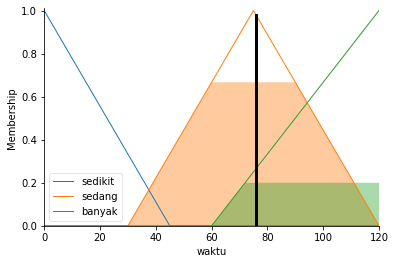

In [69]:
print ("Maka waktu yang dialokasikan")
print (tipping.output['waktu'])
waktu.view(sim=tipping)